Exp 6 : outlier detection using KNN and DBSCAN

KNN : Distance based Outlier detection method

DBSCAN : Density based outlier detection method

(Pick any one)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv(
    "C:\\Users\\DELL\\Desktop\\College\\Practicals-Apr-2025\\ADS_codes\\ADS Datasets\\Iris.csv"
)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# create arrays
X = data.drop('Species',axis=1).values
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

#KNN

NearestNeighbors(n_neighbors=3)

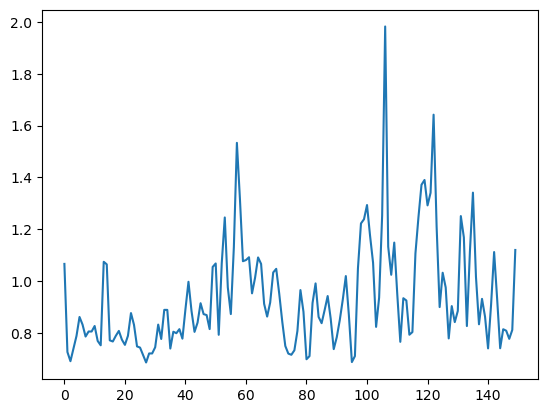

In [14]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation

plt.plot(distances.mean(axis =1))
#KNN

Calculating outlier index and values is not necessary, but useful.

🔹 distances.mean(axis=1)
What it is:
For each data point, this gives the average distance to its 3 nearest neighbors (since you used n_neighbors=3).

Why it's useful:
Points with higher average distances are more isolated → potential outliers.

How it helps:
This is your core metric for identifying outliers in the k-NN (distance-based) method.

🔹 outlier_index = np.where(distances.mean(axis=1) > 0.3)
What it is:
This applies a threshold (in this case, 0.3) to the mean distances — it returns the indices of the data points that exceed that threshold.

Why it's useful:
You're telling the algorithm:
“If the average distance to neighbors is too large, this point is an outlier.”

How it helps:
It filters your dataset to pinpoint which rows (data points) might be outliers.
You can tune 0.3 based on how strict/lenient you want to be.

🔹 outlier_values = data.iloc[outlier_index]
What it is:
This retrieves the actual rows from your original dataset that were identified as outliers based on their index.

Why it's useful:
You now know exactly which records are considered outliers and can: Investigate them, Visualize them, Remove or flag them

How it helps:
This gives you actionable data — you're no longer just visualizing outliers but can actually extract and work with them.

In [ ]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.3)
outlier_index

#KNN - optional (but valuable)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149], dtype=int64),)

In [ ]:
# filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

#KNN - Optional but Valuable

# This completes distance based outlier detection

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Everything after this is DBSCAN - Density based Outlier Detection method

In [3]:
# input data
df = data[["SepalLengthCm", "SepalWidthCm"]]
# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(df)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1 -1 -1
  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


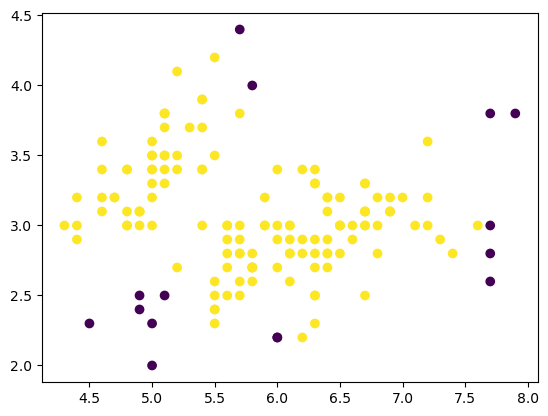

In [ ]:
# visualize outputs
colors = model.labels_
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c = colors)

In [36]:
# outliers dataframe
outliers = data[model.labels_ == -1]
print(outliers)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
14    15            5.8           4.0            1.2           0.2   
15    16            5.7           4.4            1.5           0.4   
41    42            4.5           2.3            1.3           0.3   
57    58            4.9           2.4            3.3           1.0   
60    61            5.0           2.0            3.5           1.0   
62    63            6.0           2.2            4.0           1.0   
93    94            5.0           2.3            3.3           1.0   
98    99            5.1           2.5            3.0           1.1   
106  107            4.9           2.5            4.5           1.7   
117  118            7.7           3.8            6.7           2.2   
118  119            7.7           2.6            6.9           2.3   
119  120            6.0           2.2            5.0           1.5   
122  123            7.7           2.8            6.7           2.0   
131  132            